In [73]:
# Firstly, some necessary imports

# Jupyter notebook related

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Basics of Python data handling and visualization
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pandas as pd
from shapely.geometry import Polygon

# Basics of GIS
import geopandas as gpd

# The core of this example
from eolearn.core import EOTask, EOPatch, LinearWorkflow, FeatureType, OverwritePermission, LoadFromDisk, SaveToDisk, EOExecutor, utilities

from sentinelhub import BBoxSplitter, BBox, CRS, CustomUrlParam
import sys
import os
from tqdm import tqdm_notebook as tqdm


# Suppress warnings
sys.stderr = open(os.devnull, "w")

import os
os.getcwd()
os.chdir("C:\\Users\\benos\\OneDrive\\Documents\\IJS\\Perceptive-Sentinel\\eo-learn\\examples\\land-cover-map")
os.getcwd()
import random

import cv2
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Load geojson file
country = gpd.read_file('../../example_data/svn_buffered.geojson')

# Convert CRS to UTM_33N
country_crs = CRS.UTM_33N
country = country.to_crs(crs={'init': CRS.ogc_string(country_crs)})

# Get the country's shape in polygon format
country_shape = country.geometry.values.tolist()[-1]
                                                           
use_smaller_patches = True

# Create the splitter to obtain a list of bboxes
bbox_splitter_large = BBoxSplitter([country_shape], country_crs, (25, 17))
bbox_splitter_small = BBoxSplitter([country_shape], country_crs, (25 * 3, 17 * 3))

bbox_splitter = bbox_splitter_small if use_smaller_patches else bbox_splitter_large

bbox_list = np.array(bbox_splitter.get_bbox_list())
info_list = np.array(bbox_splitter.get_info_list())

# For the future examples, we will be using a specific set of patches,
# but you are free to change the patch ID numbers in the scope of this example
# Select a central patch
ID = 1549 if use_smaller_patches else 190 

# Obtain surrounding patches
patchIDs = []
for idx, [bbox, info] in enumerate(zip(bbox_list, info_list)):
    if (abs(info['index_x'] - info_list[ID]['index_x']) <= 1 and
        abs(info['index_y'] - info_list[ID]['index_y']) <= 1):
        patchIDs.append(idx)

patchIDs = np.transpose(np.fliplr(np.array(patchIDs).reshape(3, 3))).ravel()
    
# Prepare info of selected EOPatches
geometry = [Polygon(bbox.get_polygon()) for bbox in bbox_list[patchIDs]]
idxs_x = [info['index_x'] for info in info_list[patchIDs]]
idxs_y = [info['index_y'] for info in info_list[patchIDs]]
df = pd.DataFrame({'index_x': idxs_x, 'index_y': idxs_y})
gdf = gpd.GeoDataFrame(df, 
                       crs={'init': CRS.ogc_string(country_crs)}, 
                       geometry=geometry)

# save to shapefile
shapefile_name = './selected_3x3_bboxes_slovenia_small.shp' if use_smaller_patches \
    else './selected_3x3_bboxes_slovenia_large.shp'
gdf.to_file(shapefile_name)

poly = gdf['geometry'][0]
x1, y1, x2, y2 = poly.bounds
aspect_ratio = (y1 - y2) / (x1 - x2)

# content of the geopandas dataframe
gdf.head()
fontdict = {'family': 'monospace', 'weight': 'normal', 'size': 11}

# if bboxes have all same size, estimate offset
xl, yl, xu, yu = gdf.geometry[0].bounds
xoff, yoff = (xu - xl) / 3, (yu - yl) / 5

class printPatch(EOTask):
    
    def __init__(self, comment='PrintPatch: \n'):
        self.comment = comment
        
    def execute(self, eopatch):
        print(self.comment)
        print(eopatch)
        return eopatch


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]

TypeError: During execution of task SegmentationTask: 'int' object is not subscriptable

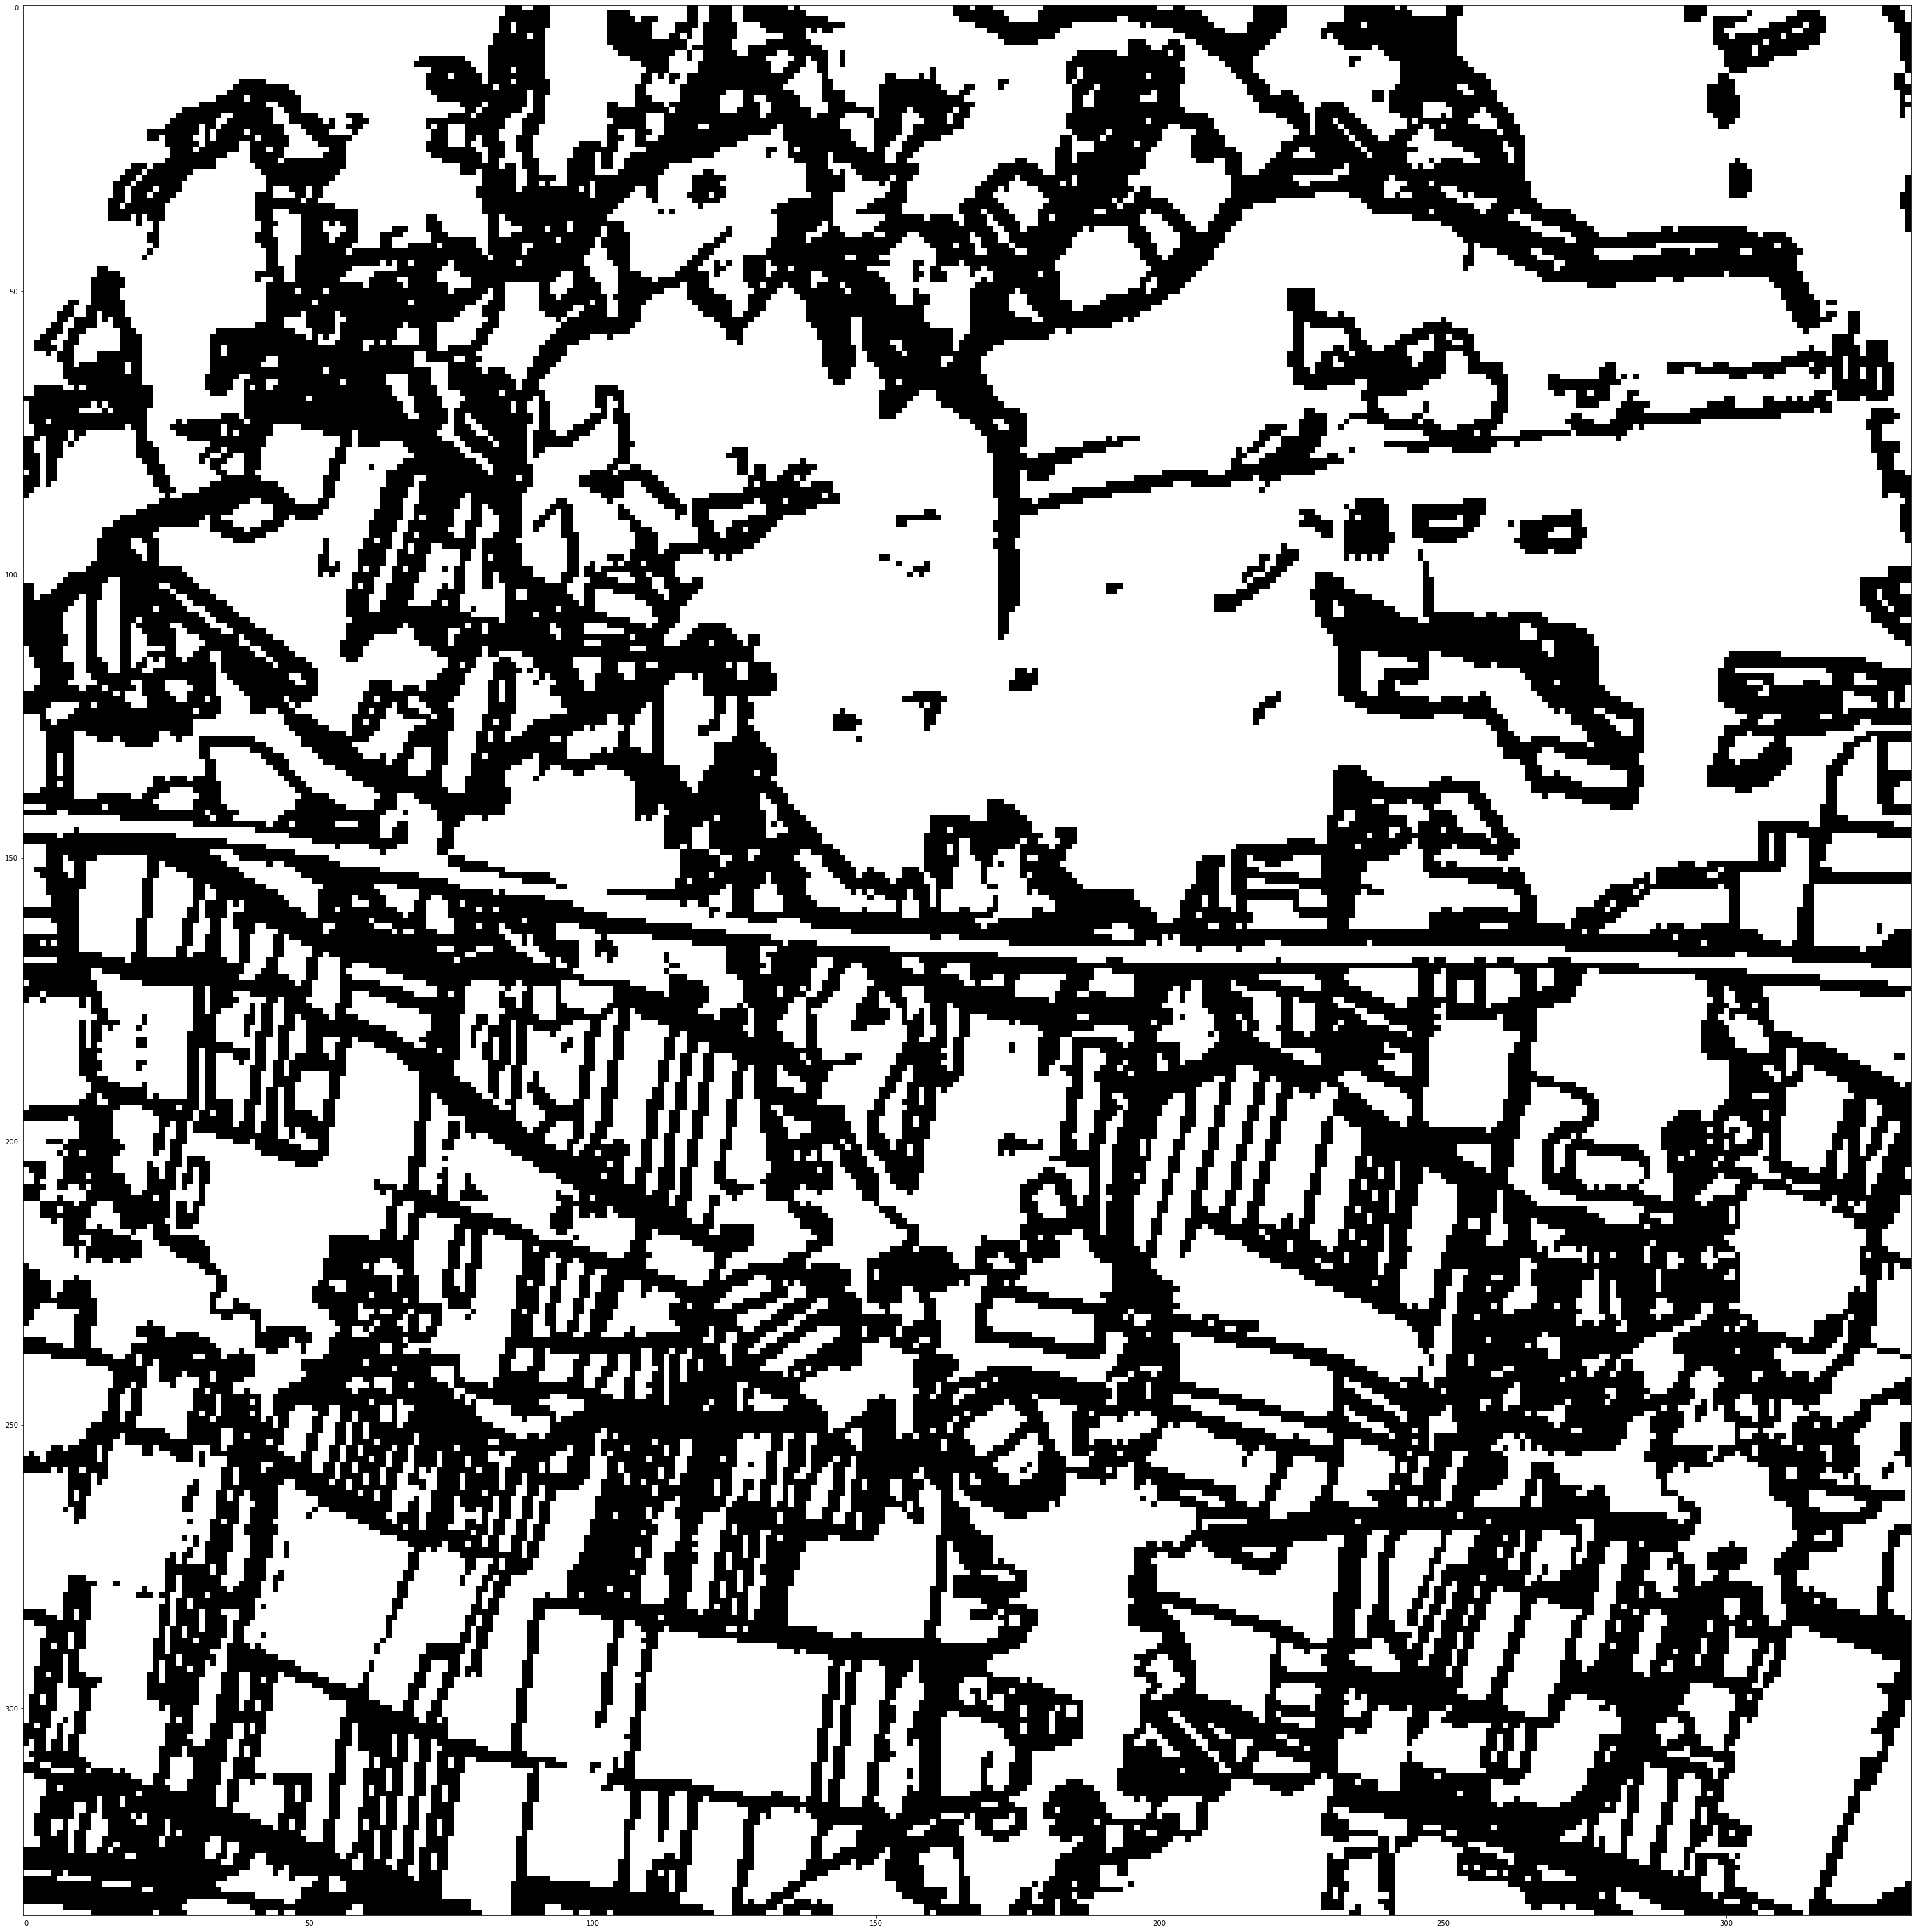

<Figure size 3600x3636.97 with 0 Axes>

In [137]:
def cosine_similarity(a,b):
    return np.dot(a, b) / (np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b)))



def color_patches(image,labels = None):
    
    def get_color(lab, colors):
        if lab == 0:
            return [0, 0, 0]
        print(colors)
        c = colors[lab]

        if c[0] != 0 and c[1] != 0 and c[2] != 0:
            c = [random.randint(15,255),random.randint(15,255),random.randint(15,255)]
            colors[lab] = c
        #print(c)
        #print(colors)
        #print((c, colors))
        ret = (c,colors)
        return ret
        
        
    
    #print(image)
    h,w = image.shape
    new_image = np.zeros((h, w, 3))
    
    if labels is None:
        labels = int(h*w/6)
    colors = np.zeros((labels,3))
    
    for x in range(w-1):
        for y in range(h-1):
            r = get_color(image[x][y], colors)
            color = r[0]
            colors = r[1]
            #print(new_image[x, y, :])
            #print(color)
            new_image[x, y, :] = color
    return new_image

class SegmentationTask(EOTask):
    
    def __init__(self, feature_mask, feature_comparison):
        self.feature_mask = feature_mask
        self.feature_comparison = feature_comparison

    '''
    def bucket_tool(image, compare_function):
        w,h=image.shape
        output = 
        
        for x in range(w)
        
        #http://cs-tklab.na-inet.jp/~tkouya/python/scipy-lectures/packages/scikit-image/index.html#image-segmentation
    '''
    
    def execute(self, eopatch):
        #https://docs.opencv.org/3.1.0/d3/dc0/group__imgproc__shape.html#gac2718a64ade63475425558aa669a943a
        input_image = eopatch[self.feature_mask[0]][self.feature_mask[1]].squeeze()
        input_image = 1-input_image
        #print(type(input_image))
        #print(input_image.shape)
        #print(input_image)
        #plt.imshow(input_image,cmap=plt.get_cmap('gray'))
        plt.figure(3, figsize=(50, 50 * aspect_ratio))
        plt.imshow(input_image, cmap=plt.get_cmap('gray'))
        
        img = input_image.astype(np.uint8)
        #img = img[200:250,100:150]
        #plt.figure(1)
        #plt.imshow(img, cmap=plt.get_cmap('gray'))
        
        connected = cv2.connectedComponentsWithStats(img)
        
        plt.figure(2,figsize=(50, 50 * aspect_ratio))
        #plt.imshow(color_patches(connected[1]), cmap=plt.get_cmap('gray'))
        plt.imshow(color_patches(connected[1]))
        #output_image,labels,stats,centroids = connected
        #colored_image = color_patches(output_image)
        #plt.imshow
        no=1
        '''
        for i in connected:
            print("____________________\n",no,"\n____________")
            no=no+1
            #print(i.shape)
            print(i)
        '''
        
        '''
        print(output_image)
        print(labels)
        print(stats)
        print(centroids)
        '''
        #imshow(output_image)
        
        return eopatch

path_out_seg = './eopatches_small_seg/'
load_seg = LoadFromDisk(path_out_seg)

segmentation = SegmentationTask((FeatureType.MASK_TIMELESS,'VEGETATION_TIMELESS'),(FeatureType.MASK_TIMELESS,'NSTF'))

workflow = LinearWorkflow(
    load_seg,
    #printPatch(),
    segmentation
)


# Execute the workflow
time_interval = ['2017-01-01', '2017-12-31'] # time interval for the SH request

pbar = tqdm(total=len(patchIDs))
#for i in range(len(patchIDs)):
for i in range(1):
    # define additional parameters of the workflow
    extra_param = {
        load_seg: {'eopatch_folder': 'eopatch_{}'.format(i)},
        #save_seg2: {'eopatch_folder': 'eopatch_{}'.format(i)}
    }
    
    workflow.execute(extra_param)    
    pbar.update(1)
